# Predicting the stock market

In this project, I will be working with a data that contains daily results from the S&P 500. The S&P 500 is one of the three biggest Index that is used to measure the health and performance of the global economy and the stock market. It contains the performance of 500 large cap companies listed on stock exchange in the U.S. 

Stock market Indexes are a powerful indicator of the global and country specific economies. Although there are many different types of Index avaliable to be utilized by investors, the three widely followed and used Indexes in the U.S. are the S&P 500, Dow Jones Industrial Average and Nasdaq Composite. The S&P 500 index is composed of the top 500 companies. These Indexes aggregate the prices of all stock together based on the weight it carries and allow investors to evaluate the market. 

In this project, I will be using historical time series data on the price of the S&P 500 Index to make predictions about future prices. Each row in the data represents a daily record of the prices change for the Index starting in 2015 to 2020. 

The columns of the dataset are:

* Date -- The date of the record.
* Open -- The opening price of the day (when trading starts).
* High -- The highest trade price during the day.
* Low -- The lowest trade price during the day.
* Close -- The closing price for the day (when trading is finished).
* Volume -- The number of shares traded.
* Adj Close -- The daily closing price, adjusted retroactively to include any

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import yfinance as yf

In [2]:
start = datetime(2015, 1, 1)
end = datetime(2020, 11, 19)

#define the ticker symbol
tickerSymbol = '^GSPC'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this S&P 500 Index
sp500 = tickerData.history(period='1d', start=start, end=end)

#see data
sp500.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-12,3562.669922,3569.020020,3518.580078,3537.010010,4890120000,0,0
2020-11-13,3552.570068,3593.659912,3552.570068,3585.149902,4709670000,0,0
2020-11-16,3600.159912,3628.510010,3600.159912,3626.909912,5281980000,0,0
2020-11-17,3610.310059,3623.110107,3588.679932,3609.530029,4799570000,0,0
2020-11-18,3612.090088,3619.090088,3567.330078,3567.790039,5274450000,0,0


In [3]:
sp500.info()
# Sort the dataframe on Date col in Ascending order and set index
sp500.sort_values("Date", ascending=True, inplace=True)
sp500.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1482 entries, 2015-01-02 to 2020-11-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1482 non-null   float64
 1   High          1482 non-null   float64
 2   Low           1482 non-null   float64
 3   Close         1482 non-null   float64
 4   Volume        1482 non-null   int64  
 5   Dividends     1482 non-null   int64  
 6   Stock Splits  1482 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 92.6 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,0,0
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,0,0
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,0,0
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,0,0
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,0,0


### Explore and Visualize our data
I will be analyzing the S&P 500 Index prices for the past five years.  

In [4]:
# Performing comparasions
sp500.index > datetime(year=2015, month=4, day=1)

print(sp500.count())
sp500.describe()

Open            1482
High            1482
Low             1482
Close           1482
Volume          1482
Dividends       1482
Stock Splits    1482
dtype: int64


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1482.000000,1482.000000,1482.000000,1482.000000,1.482000e+03,1482.0,1482.0
mean,2559.232131,2572.032671,2544.942935,2559.381645,3.829670e+09,0.0,0.0
std,430.381892,432.933207,427.775756,430.317938,9.488065e+08,0.0,0.0
min,1833.400024,1847.000000,1810.099976,1829.079956,1.296540e+09,0.0,0.0
25%,2119.632507,2125.485046,2110.192444,2120.867554,3.280415e+09,0.0,0.0
50%,2571.604980,2583.395020,2559.734985,2575.234985,3.620055e+09,0.0,0.0
75%,2878.077515,2891.865051,2861.890076,2878.454956,4.095340e+09,0.0,0.0
max,3612.090088,3645.989990,3600.159912,3626.909912,9.044690e+09,0.0,0.0


Text(0.5, 1.0, 'S&P 500 Index Price 1/1/15 - 11/19/20')

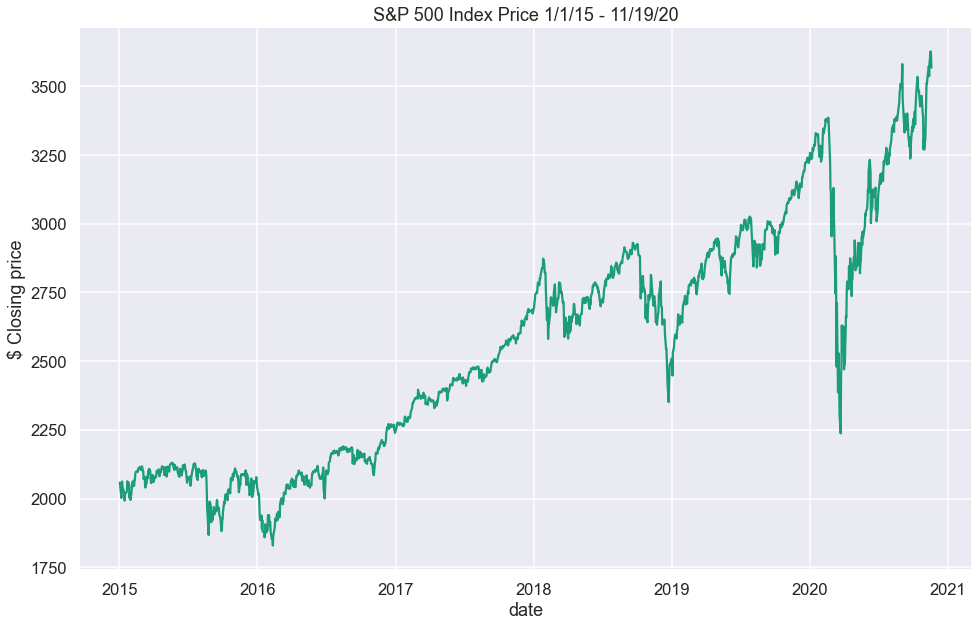

In [5]:
start = datetime(2015, 1, 1)
end = datetime(2020, 11, 19)

plt.figure(figsize=(16,10))
plt.plot(sp500.index, sp500['Close'])
plt.xlabel("date")
plt.ylabel("$ Closing price")
plt.title("S&P 500 Index Price 1/1/15 - 11/19/20")

From the plot above, we can see that the market has been on a consistent and steady rise for the past 4 years with the exception of the dip seen at the end of 2018 and begining of 2020. The reason for those price drops can be linked to the U.S. government shutdown in 2018 and COVID 19.

### Technical analysis Indicators

In order to be able to find patterns that can help me predict future prices, I will be creating new columns containing indicators such as the rolling Simple Moving Average(SMA), Exponential Moving Average(EMA), ratio between the average prices at a different times and standard deviation of price movements. I will use this computed indicators to predict future prices. 

### More indicators to consider 

- The average volume over the past five days.
- The average volume over the past year.
- The ratio between the average volume for the past five days, and the average volume for the past year.
- The standard deviation of the average volume over the past five days.
- The standard deviation of the average volume over the past year.
- The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.
- The year component of the date.
- The ratio between the lowest price in the past year and the current price.
- The ratio between the highest price in the past year and the current price.
- The month component of the date.
- The day of week.
- The day component of the date.
- The number of holidays in the prior month.

In [6]:
# Compute rolling moving average for 5, 30 and 365 days 
# We shit by 1 to avoid the current date from being in the avg calc 
SMA_five = sp500["Close"].rolling(5, min_periods=5).mean().shift()
SMA_thirty = sp500["Close"].rolling(30, min_periods=30).mean().shift()
SMA_365 = sp500["Close"].rolling(365, min_periods=365).mean().shift()

In [7]:
# Compute standard deviation of Closing price for 5 days and 365 days 
SMA_five_std = sp500["Close"].rolling(5, min_periods=5).std().shift()
SMA_365_std = sp500["Close"].rolling(365, min_periods=365).std().shift()

In [8]:
# Assign computed indicators to a new col
sp500["SMA_five_mean"] = SMA_five
sp500["SMA_thirty_mean"] = SMA_thirty
sp500["SMA_365_mean"] = SMA_365

sp500["SMA_five_std"] = SMA_five_std
sp500["SMA_365_std"] = SMA_365_std

In [9]:
# Calculate and assign ratio of avg prices to a col
sp500["mean_ratio"] = ((sp500["SMA_five_mean"]) / (sp500["SMA_365_mean"]))
sp500["std_ratio"] = ((sp500["SMA_five_std"]) / (sp500["SMA_365_std"]))

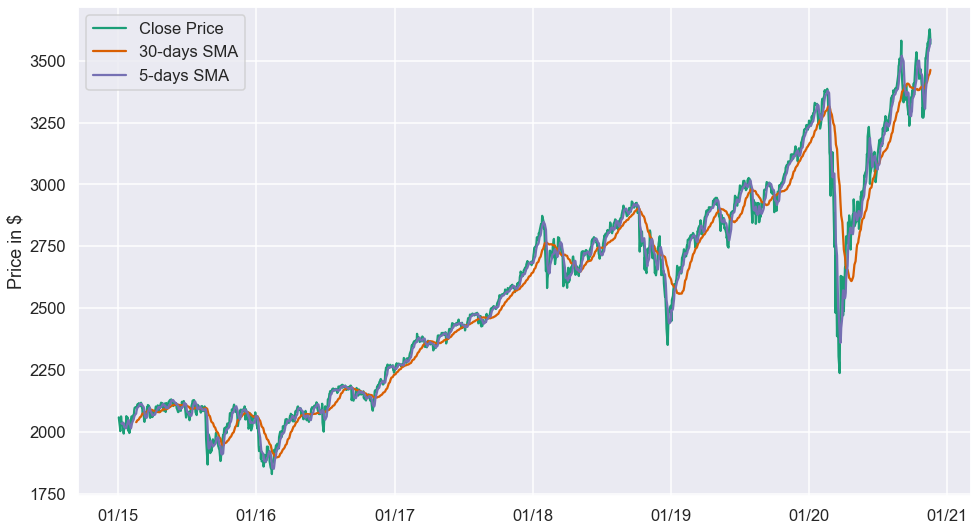

In [10]:
# Plot the Closing price, 30-days SMA and 5-days SMA for the past 2 years
start_date = '2015-01-01'
end_date = '2020-11-18'
my_year_month_fmt = mdates.DateFormatter('%m/%y')

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(sp500.loc[start_date:end_date, :].index, sp500.loc[start_date:end_date, 'Close'], label='Close Price')
ax.plot(sp500.loc[start_date:end_date, :].index, sp500.loc[start_date:end_date, 'SMA_thirty_mean'], label = '30-days SMA')
ax.plot(sp500.loc[start_date:end_date, :].index, sp500.loc[start_date:end_date, 'SMA_five_mean'], label = '5-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

### SMA VS EMA

SMA timeseries lag the original price timeseries, which means that changes in the trend are only seen with a delay (lag) of L days. One way to reduce the lag induced by the use of the SMA is to use the Exponential Moving Average (EMA). The reason why EMA reduces the lag is that it puts more weight on more recent observations, whereas the SMA weights all observations equally. 

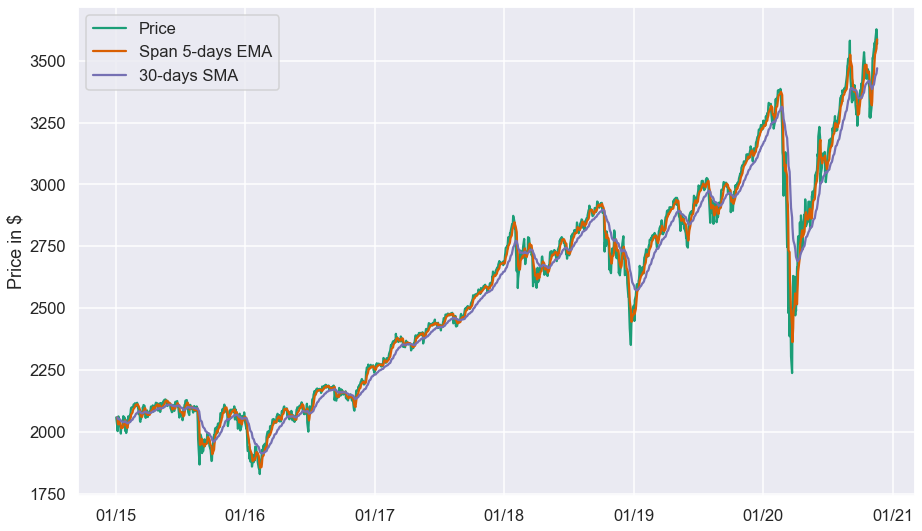

In [11]:
EMA_five = sp500.ewm(span=5, adjust=False).mean().shift()
EMA_30 = sp500.ewm(span=30, adjust=False).mean().shift()
EMA_365 = sp500.ewm(span=365, adjust=False).mean().shift()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(sp500.loc[start_date:end_date, :].index, sp500.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(EMA_five.loc[start_date:end_date, :].index, EMA_five.loc[start_date:end_date, 'Close'], label = 'Span 5-days EMA')
ax.plot(EMA_30.loc[start_date:end_date, :].index, EMA_30.loc[start_date:end_date, 'Close'], label = '30-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

### Model Selection

For this project I am using the Linear Regression model. For error metric I will select to use Mean Absolute Error(MAE) because it will show me how close I am to the price in intuitive terms. An alternative error metric is Mean Squared Error(MSE) however it makes it harder to intuitively tell how far off we are from the true price because it squares the error.

I will start by removing data that don't have enough historical data to compute all the indicators and I will also drop rows with null values. 

In [12]:
# not enough data to compute 365 moving average
sp = sp500[sp500.index > datetime(year=2016, month=1, day=2)]

# Remove any rows with NaN values.
sp.dropna(axis=0, inplace=True)

<ipython-input-12-39dc37da618a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp.dropna(axis=0, inplace=True)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [14]:
def train_and_test(df):
    # Split for train and test data. 
    # I will use 3 years of data for training and the past year for test data
    train = df[df.index < datetime(year=2020, month=1, day=1)]
    test = df[df.index >= datetime(year=2020, month=1, day=1)]


    # Split train data into features & target. 
    features = train.iloc[:, 7:]
    target = train.loc[:, "Close"]
    # Split test data into features & target. 
    features_test = test.iloc[:, 7:]
    target_test = test.loc[:, "Close"]
    
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set. 
    predictions = lr.predict(features_test) 
    # Compute MAE and Variance.
    mae = mean_absolute_error(target_test, predictions)
    variance = np.var(predictions)
    return(mae, variance)

In [17]:
print(test.Close.max())
print(test.Close.min())
mae, var = train_and_test(sp)
print(mae, var)

3626.909912109375
2237.39990234375
58.254814011616986 83224.31604779667


In [16]:
# Remove features not needed 
features = sp.iloc[:, 7:]
target = sp.loc[:, "Close"]

# Split for train and test data. 
# I will use 3 years of data for training and the past year for test data
train = sp[sp.index < datetime(year=2020, month=1, day=1)]
test = sp[sp.index >= datetime(year=2020, month=1, day=1)]

print(train.shape)
print(test.shape)

(893, 14)
(224, 14)


In [18]:
features = train[["SMA_five_mean", "SMA_thirty_mean", "SMA_365_mean", "SMA_five_std",
                           "SMA_365_std"]]
target = train["Close"]


test_features = test[["SMA_five_mean", "SMA_thirty_mean", "SMA_365_mean", "SMA_five_std",
                           "SMA_365_std"]]
test_target = test["Close"]

In [19]:
lr = LinearRegression()
lr.fit(features, target)

LinearRegression()

In [20]:
predictions = lr.predict(test_features) 

In [21]:
mae = mean_absolute_error(test_target, predictions)
variance = np.var(predictions)
print(mae)
print(variance)


# table to show the actual values and predicted values
pred_test = pd.DataFrame({'Actual': test_target, 'Predicted': predictions})
print(pred_test)

57.23275364274138
78854.7953824567
                 Actual    Predicted
Date                                
2020-01-02  3257.850098  3234.759868
2020-01-03  3234.850098  3239.393529
2020-01-06  3246.280029  3238.369120
2020-01-07  3237.179932  3239.272420
2020-01-08  3253.050049  3243.928787
...                 ...          ...
2020-11-12  3537.010010  3537.495801
2020-11-13  3585.149902  3544.731700
2020-11-16  3626.909912  3560.933885
2020-11-17  3609.530029  3568.715430
2020-11-18  3567.790039  3581.731620

[224 rows x 2 columns]


In [22]:
# Generate coefficient of features used
coeff_df = pd.DataFrame(lr.coef_, test_features.columns, columns=['Coefficient'])
coeff_df

,Coefficient
SMA_five_mean,0.991823
SMA_thirty_mean,-0.046455
SMA_365_mean,0.057688
SMA_five_std,-0.463130
SMA_365_std,0.084620


In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_target, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test_target, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_target, predictions)))

Mean Absolute Error: 57.23275364274138
Mean Squared Error: 6316.467822894169
Root Mean Squared Error: 79.47620916283168


### Conclusion

After fitting the linear regression model using 7 computed indicators, I was able to get MAE of 58.25 which is high considering our prices ranges from 2000 to 3626 but it is not a significantly large number. After expermenting by adding and removing indicators, with 5 indicators the MAE slightly dropped to 57.23 but not a significant change. I will try to compute and experment with more indicators that might give me a better insights into future prices of S&P 500 prices. 